5229 participants (over 18y old, US residents, fitbit owners) followed over 4 months

-survey data
    Baseline (demographics, medical history...)
    Daily one-click y/n question 'Do you have flu sypmtoms'
        if yes:
            more symptom specific questions
            lab test triggered if (cough>0) and (muscle_ache > 0 or chills > 0 or fever > 0 or sweats > 0) for the 1st time
            continue follow up with more questions until recovery
        else if no:
            continue
    
    1863 participants reported symptoms at least once
    1395 of those satisfied test trigger criteria at some point (1142 satisfied at their 1st report)
            
-lab data (test results)
    1006 participants had tests results
    980 participants had valid tests (1142 - 1043 = 99 participants did not send test kits back?) 
    (all 980 valid tests from the trigger criteria positives [1395])
    (1010 of tests are from the triggered participants, 33 other symptom reporters)
    3 test per participant (flu A, flu B, RSV)
    227 positive participants ( 149 flu A, 57 flu B, 21 RSV)

-activity data
    day level
        5195 participants, avg 116 days
    minute level
        5195 participants, avg 114 days
        sleep, h_rate, step_count

In [2]:
import pyarrow.parquet as pq
import numpy as np
import pandas as pd
import os
import glob

Participants were prompted to complete their at-home kit if they reported experiencing symptom
severity of greater than 0 for “Cough”, and greater than 0 for one of the four systemic symptoms
“Body/Muscle aches”  ”Feeling feverish”  ”Chills or shivering”  ”Sweats”

#TODO
      - missingness, imbalance
      - screener includes age, gender and race

In [19]:
path_root = os.getcwd()+"/gates/raw/audere/data-export/2020-07-15/survey"

path_baseline = glob.glob(path_root+"/baseline/*.parquet")
paths_follow_up_a = glob.glob(path_root+"/follow_up_a/*.parquet")
paths_follow_up_b = glob.glob(path_root+"/follow_up_b/*.parquet")
paths_recovery = glob.glob(path_root+"/recovery/*.parquet")
paths_screener = glob.glob(path_root+"/screener/*.parquet")

In [20]:
#Reading survey data from parquet files in corresponding directories
df_baseline = pq.read_table(path_baseline[0]).to_pandas()

df_fup_a = pd.DataFrame()
for path in paths_follow_up_a:
    df_fup_a = pd.concat([df_fup_a, pq.read_table(path).to_pandas()])
    
df_fup_b = pd.DataFrame()
for path in paths_follow_up_b:
    df_fup_b = pd.concat([df_fup_b, pq.read_table(path).to_pandas()])

df_recovery = pd.DataFrame()
for path in paths_recovery:
    df_recovery = pd.concat([df_recovery, pq.read_table(path).to_pandas()])

df_screener = pd.DataFrame()
for path in paths_screener:
    df_screener = pd.concat([df_screener, pq.read_table(path).to_pandas()])
    

In [163]:
pd.set_option("display.max.columns", None)

df_baseline.describe(include=np.object)

,participant_id,height__ft,height__in,weight,pregnant,education,employment,employment__other,income,insurance_any,insurance_type,insurance_type__other,household_size__0_4_years,household_size__5_12_years,household_size__13_17_years,household_size__18_64_years,household_size__65+_years,marital_status,clinic_volunteer_job,work_with_children,regular_pub_transport,health_conditions__none,health_conditions__anxiety,health_conditions__asthma,health_conditions__afib,health_conditions__cancer,health_conditions__copd,health_conditions__coronary_disease,health_conditions__depression,health_conditions__diabetes_1,health_conditions__diabetes_2,health_conditions__fibromyalgia,health_conditions__gerd,health_conditions__heart_failure,health_conditions__high_choles,health_conditions__hypertension,health_conditions__heart_attack,health_conditions__stroke,health_conditions__hiv_aids,health_conditions__thyroid_issue,health_conditions__inflam_bowel,health_conditions__kidney_disease,health_conditions__liver_disease,health_conditions__lupus,health_conditions__migraines,health_conditions__ms,health_conditions__neurodegen,health_conditions__arthritis,health_conditions__osteoporosis,health_conditions__psoriasis,health_conditions__rheumatoid_arthritis,health_conditions__other,prescription_usage,prescription_med__cholesterol,prescription_med__steroids,prescription_med__antidepressants,prescription_med__anti_anxiety,prescription_med__blood_pressure,prescription_med__blood_thinners,prescription_med__opioids,prescription_med__antibiotics,prescription_med__antiretroviral,prescription_med__muscle_relaxants,prescription_med__anti_seizure,prescription_med__insulin,prescription_med__injectable_diabetes,prescription_med__oral_diabetes,prescription_med__injectable_antibodies,prescription_med__oral_disease_modifying,prescription_med__inhalers,prescription_med__birth_control,prescription_med__hormones,prescription_med__other,otc_usage,otc_med__advil,otc_med__aspirin,otc_med__tylenol,otc_med__aleve,otc_med__sudafed,otc_med__sudafed_pe,otc_med__delsym,otc_med__mucinex_robitussin,otc_med__nyquil,otc_med__dayquil,otc_med__flonase,otc_med__afrin,otc_med__i_don’t_know_can’t_remember,otc_med__other,flu_health_seeking_habits,healthcare_usage,healthcare_usage_flu,er_visit,er_visit_flu,hospital_visit,hospital_visit_flu,flu_diagnosis_ever,non_flu_resp_infec_ever,experienced_non_flu__cold,experienced_non_flu__bronchitis,experienced_non_flu__sore_throat,experienced_non_flu__other,diagnosed_non_flu__cold,diagnosed_non_flu__bronchitis,diagnosed_non_flu__sore_throat,diagnosed_non_flu__other,flu_vaccine_habits,flu_vaccine_last_yr,flu_vaccine_current_season,flu_vaccine_time__date,flu_med_prescribed__tamiflu,flu_med_prescribed__xofluza,flu_med_prescribed__relenza,flu_med_prescribed__oral_antibiotics,flu_med_prescribed__inhalers,flu_med_prescribed__oral_steroids,flu_med_prescribed__none,flu_med_prescribed__do_not_know,flu_med_prescribed__other,otc_flu_usage__fever_reducers,otc_flu_usage__cough_suppressants,otc_flu_usage__chest_or_mucus_decongestants,otc_flu_usage__nasal_decongestants,otc_flu_usage__none,otc_flu_usage__do_not_know,otc_flu_usage__other,difficulty_mobility__mobility_getting_around,difficulty_mobility__self_care_activities,difficulty_mobility__usual_daily_activities,experience_issue__pain_or_discomfort,experience_issue__anxiety_or_depression,health_rating__diet_nutrition,health_rating__exercise_physical_activity,health_rating__sleep,days_exercise,avg_hours_sleep_wk,avg_hours_sleep_wkend
count,5229,5229,5229,5229,3776,5229,5229,239,5229,5229,4957,265,5229,5229,5229,5229,5229,5229,5229,5229,5229,1852,1262,981,27,129,32,19,1201,38,201,135,361,11,484,632,18,13,4,415,103,27,15,18,824,26,5,234,23,114,64,335,5229,326,31,842,418,562,52,55,43,11,129,134,72,33,195,27,37,427,852,399,690,5229,887,169,613,265,79,31,5,104,74,71,301,15,6,793,5229,5229,4748,5229,4746,5229,4746,4746,5229,4747,4601,4701,4272,4110,820,3548,707,5229,5229,5229,2771,1086,7,2,1216,616,500,1919,1145,115,4193,324

In [235]:
df_baseline.head()

,participant_id,timestamp,height__ft,height__in,weight,pregnant,education,employment,employment__other,income,insurance_any,insurance_type,insurance_type__other,household_size__0_4_years,household_size__5_12_years,household_size__13_17_years,household_size__18_64_years,household_size__65+_years,marital_status,clinic_volunteer_job,work_with_children,regular_pub_transport,health_conditions__none,health_conditions__alz,health_conditions__anxiety,health_conditions__asthma,health_conditions__afib,health_conditions__cancer,health_conditions__copd,health_conditions__coronary_disease,health_conditions__depression,health_conditions__diabetes_1,health_conditions__diabetes_2,health_conditions__fibromyalgia,health_conditions__gerd,health_conditions__heart_failure,health_conditions__high_choles,health_conditions__hypertension,health_conditions__heart_attack,health_conditions__stroke,health_conditions__hiv_aids,health_conditions__thyroid_issue,health_conditions__inflam_bowel,health_conditions__kidney_disease,health_conditions__liver_disease,health_conditions__lupus,health_conditions__migraines,health_conditions__ms,health_conditions__neurodegen,health_conditions__arthritis,health_conditions__osteoporosis,health_conditions__psoriasis,health_conditions__rheumatoid_arthritis,health_conditions__other,prescription_usage,prescription_med__cholesterol,prescription_med__steroids,prescription_med__antidepressants,prescription_med__anti_anxiety,prescription_med__blood_pressure,prescription_med__blood_thinners,prescription_med__opioids,prescription_med__antibiotics,prescription_med__antiretroviral,prescription_med__muscle_relaxants,prescription_med__anti_seizure,prescription_med__insulin,prescription_med__injectable_diabetes,prescription_med__oral_diabetes,prescription_med__injectable_antibodies,prescription_med__oral_disease_modifying,prescription_med__inhalers,prescription_med__birth_control,prescription_med__hormones,prescription_med__other,otc_usage,otc_med__advil,otc_med__aspirin,otc_med__tylenol,otc_med__aleve,otc_med__sudafed,otc_med__sudafed_pe,otc_med__delsym,otc_med__mucinex_robitussin,otc_med__nyquil,otc_med__dayquil,otc_med__flonase,otc_med__afrin,otc_med__i_don’t_know_can’t_remember,otc_med__other,flu_health_seeking_habits,healthcare_usage,healthcare_usage_flu,er_visit,er_visit_flu,hospital_visit,hospital_visit_flu,flu_diagnosis_ever,non_flu_resp_infec_ever,experienced_non_flu__cold,experienced_non_flu__bronchitis,experienced_non_flu__sore_throat,experienced_non_flu__other,experienced_non_flu__i_am_not_sure,diagnosed_non_flu__cold,diagnosed_non_flu__bronchitis,diagnosed_non_flu__sore_throat,diagnosed_non_flu__other,diagnosed_non_flu__i_am_not_sure,flu_vaccine_habits,flu_vaccine_last_yr,flu_vaccine_current_season,flu_vaccine_time__date,flu_med_prescribed__tamiflu,flu_med_prescribed__xofluza,flu_med_prescribed__relenza,flu_med_prescribed__oral_antibiotics,flu_med_prescribed__inhalers,flu_med_prescribed__oral_steroids,flu_med_prescribed__none,flu_med_prescribed__do_not_know,flu_med_prescribed__other,otc_flu_usage__fever_reducers,otc_flu_usage__cough_suppressants,otc_flu_usage__chest_or_mucus_decongestants,otc_flu_usage__nasal_decongestants,otc_flu_usage__none,otc_flu_usage__do_not_know,otc_flu_usage__other,difficulty_mobility__mobility_getting_around,difficulty_mobility__self_care_activities,difficulty_mobility__usual_daily_activities,experience_issue__pain_or_discomfort,experience_issue__anxiety_or_depression,health_rating__diet_nutrition,health_rating__exercise_physical_activity,health_rating__sleep,days_exercise,avg_hours_sleep_wk,avg_hours_sleep_wkend
0,2983a57962cf4f3d7d5d40921205b208,2019-12-18 21:33:19,5,3,225.0,No,"Some college, no degree",I am employed full-time (at least 36 hours/week),None,"$25,000 - $34,999",Yes,"Private insurance (e.g. Humana, UnitedHealthcare)",None,0,0,0,1,0,"Single, never married",I am not usually in a hospital/clinic setting ...,I do not usually work or volunteer with children,No,I have not been diagnosed wi

In [165]:
df_fup_a.describe(include=np.object)

,occurrence,participant_id,have_flu,recovered_yn,recovery_datetime,t_recov_severity__q_recov_aches,t_recov_severity__q_recov_chills,t_recov_severity__q_recov_congestion,t_recov_severity__q_recov_cough,t_recov_severity__q_recov_fatigue,t_recov_severity__q_recov_fever,t_recov_severity__q_recov_headaches,t_recov_severity__q_recov_sneezing,t_recov_severity__q_recov_sore_throat,t_recov_severity__q_recov_sweats,symptom_severity__aches_q,symptom_severity__chills_q,symptom_severity__cough_q,symptom_severity__fever_q,symptom_severity__q_congestion,symptom_severity__q_fatigue,symptom_severity__q_headache,symptom_severity__q_sneezing,symptom_severity__q_sore_throat,symptom_severity__sweats_q,first_report_yn,first_sx_datetime,severity_overall,body_temp_avail_yn,body_temp_f,body_temp_loc,med_rx_yn,med_rx_name__1,med_rx_name__2,med_rx_name__3,med_rx_name__4,med_rx_name__5,med_rx_name__6,med_rx_name__7,med_otc_yn,med_otc_name__1,med_otc_name__2,med_otc_name__3,med_otc_name__4,med_otc_name__5,med_otc_name__6,t_difficulty__q_dailyact,t_difficulty__q_mobility,t_difficulty__q_selfcare,t_experience__q_gad_mdd,t_experience__q_pain
count,10216,10216,10216,10216,10133,10133,10133,10133,10133,10133,10133,10133,10133,10133,10133,10187,10187,10187,10187,10187,10187,10187,10187,10187,10187,10087,10070,10066,10151,10134,10134,10038,10216,10216,10216,10216,10216,10216,10216,10029,10216,10216,10216,10216,10216,10216,9985,9989,9993,10015,10015
unique,120,1863,1,2,929,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,2,1824,3,3,196,6,3,3,3,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4
top,6,83f72f4f8d2109079ffc1c5728135fa1,1,0,skipped,skipped,skipped,skipped,skipped,skipped,skipped,skipped,skipped,skipped,skipped,0,0,1,0,1,1,0,0,1,0,0,skipped,1,1,skipped,skipped,0,skipped,skipped,skipped,skipped,skipped,skipped,skipped,1,1,0,0,0,0,0,0,0,0,0,1
freq,177,98,10216,9102,9102,9102,9102,9102,9102,9102,9102,9102,9102,9102,9102,3640,6067,4893,5771,4363,3571,3592,4089,4294,6316,7942,7942,6644,5030,5121,5121,8351,8361,8361,8361,8361,8361,8361,8361,6312,4179,3994,4299,3808,6478,5765,5383,6563,6850,6158,5041


In [169]:
# To see how many symptomatic participants satisfy the test trigger criteria
df_trigerred_fup_a = df_fup_a.loc[
             (df_fup_a.symptom_severity__cough_q != '0') & (df_fup_a.symptom_severity__cough_q != 'skipped') &  
             (((df_fup_a.symptom_severity__aches_q != '0') & (df_fup_a.symptom_severity__aches_q != 'skipped')) 
             | ((df_fup_a.symptom_severity__chills_q != '0') & (df_fup_a.symptom_severity__chills_q != 'skipped')) 
             | ((df_fup_a.symptom_severity__fever_q != '0') & (df_fup_a.symptom_severity__fever_q != 'skipped')) 
             | ((df_fup_a.symptom_severity__sweats_q != '0') & (df_fup_a.symptom_severity__sweats_q != 'skipped')))
            ]
df_trigerred_fup_a.describe(include=np.object)

,occurrence,participant_id,have_flu,recovered_yn,recovery_datetime,t_recov_severity__q_recov_aches,t_recov_severity__q_recov_chills,t_recov_severity__q_recov_congestion,t_recov_severity__q_recov_cough,t_recov_severity__q_recov_fatigue,t_recov_severity__q_recov_fever,t_recov_severity__q_recov_headaches,t_recov_severity__q_recov_sneezing,t_recov_severity__q_recov_sore_throat,t_recov_severity__q_recov_sweats,symptom_severity__aches_q,symptom_severity__chills_q,symptom_severity__cough_q,symptom_severity__fever_q,symptom_severity__q_congestion,symptom_severity__q_fatigue,symptom_severity__q_headache,symptom_severity__q_sneezing,symptom_severity__q_sore_throat,symptom_severity__sweats_q,first_report_yn,first_sx_datetime,severity_overall,body_temp_avail_yn,body_temp_f,body_temp_loc,med_rx_yn,med_rx_name__1,med_rx_name__2,med_rx_name__3,med_rx_name__4,med_rx_name__5,med_rx_name__6,med_rx_name__7,med_otc_yn,med_otc_name__1,med_otc_name__2,med_otc_name__3,med_otc_name__4,med_otc_name__5,med_otc_name__6,t_difficulty__q_dailyact,t_difficulty__q_mobility,t_difficulty__q_selfcare,t_experience__q_gad_mdd,t_experience__q_pain
count,5287,5287,5287,5287,5287,5287,5287,5287,5287,5287,5287,5287,5287,5287,5287,5258,5258,5258,5258,5258,5258,5258,5258,5258,5258,5250,5242,5241,5238,5228,5228,5225,5287,5287,5287,5287,5287,5287,5287,5220,5287,5287,5287,5287,5287,5287,5194,5193,5196,5211,5211
unique,120,1395,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,3,4,4,4,4,4,4,4,2,1088,3,2,146,6,3,3,3,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4
top,6,0fcd3f13e0172dd5176f128a2eaa3b02,1,0,skipped,skipped,skipped,skipped,skipped,skipped,skipped,skipped,skipped,skipped,skipped,1,0,1,0,1,2,1,1,1,0,0,skipped,1,1,skipped,skipped,0,skipped,skipped,skipped,skipped,skipped,skipped,skipped,1,1,0,0,0,0,0,1,0,0,0,1
freq,83,80,5287,5287,5287,5287,5287,5287,5287,5287,5287,5287,5287,5287,5287,3011,2726,3004,2463,2148,2184,2236,2421,2413,2873,4039,4039,2615,3151,2087,2087,4224,4228,4228,4228,4228,4228,4228,4228,3699,2768,2201,2452,2149,3753,3344,2633,2642,2845,2738,2911


In [174]:
#Number of day stats for symptom reporting patients
df_trigerred_fup_a.participant_id.value_counts().describe()

count    1395.000000
mean        3.789964
std         4.287838
min         1.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        80.000000
Name: participant_id, dtype: float64

In [10]:
df_fup_b.describe(include=np.object)

,occurrence,participant_id,have_flu,t_difficulty__q_dailyact,t_difficulty__q_mobility,t_difficulty__q_selfcare,t_experience__q_gad_mdd,t_experience__q_pain,recovery_48_h,t_recov_severity__q_recov_aches,t_recov_severity__q_recov_chills,t_recov_severity__q_recov_congestion,t_recov_severity__q_recov_cough,t_recov_severity__q_recov_fatigue,t_recov_severity__q_recov_fever,t_recov_severity__q_recov_headache,t_recov_severity__q_recov_sneezing,t_recov_severity__q_recov_sore_throat,t_recov_severity__q_recov_sweats
count,517661,517661,517661,517661,517661,517661,517661,517661,517661,517640,517637,517648,517639,517647,517637,517646,517642,517642,517638
unique,120,5189,1,3,3,3,4,4,3,5,5,5,5,5,5,5,5,5,5
top,21,34f35a3400710d62764b435b72b3fdff,0,0,0,0,0,0,1,skipped,skipped,skipped,skipped,skipped,skipped,skipped,skipped,skipped,skipped
freq,4473,120,517661,487531,485828,493378,384241,393537,435676,515669,515669,515669,515669,515669,515669,515669,515669,515669,515669


In [183]:
df_lab_updates = pd.read_csv('gates_data_csv/lab_updates.csv')

df_lab_updates['shipped_datetime'] = pd.to_datetime(df_lab_updates.shipped_datetime)
df_lab_updates['received_datetime'] = pd.to_datetime(df_lab_updates.received_datetime)
df_lab_updates['report_sent_datetime'] = pd.to_datetime(df_lab_updates.report_sent_datetime)

In [187]:
#Selecting when kits were received for each participant
df_lab_updates_received = df_lab_updates.loc[(~df_lab_updates['received_datetime'].isnull())]
df_lab_updates_received['received_datetime'] = df_lab_updates_received['received_datetime'].dt.tz_convert(None)
df_lab_updates_received = df_lab_updates_received[['participant_id','received_datetime']]

<ipython-input-187-059e2ca88ef7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lab_updates_received['received_datetime'] = df_lab_updates_received['received_datetime'].dt.tz_convert(None)


In [228]:
# Valid lab results
df_lab_results = pd.read_csv('gates_data_csv/lab_results.csv')
df_lab_results['report_sent_datetime'] = pd.to_datetime(df_lab_results.report_sent_datetime).dt.tz_convert(None)
df_lab_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            2940 non-null   int64         
 1   participant_id        2940 non-null   object        
 2   report_sent_datetime  2940 non-null   datetime64[ns]
 3   tempstrip_status      2937 non-null   object        
 4   test_name             2940 non-null   object        
 5   result                2940 non-null   object        
 6   result_value          2883 non-null   object        
 7   assay_datetime        2889 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 183.9+ KB


In [229]:
# Number of lab tests explainable by the test trigger criteria
pd.merge(df_trigerred_fup_a.participant_id.drop_duplicates(), df_lab_updates_received
         , how = 'left', on = 'participant_id').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1395 entries, 0 to 1394
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   participant_id     1395 non-null   object        
 1   received_datetime  1010 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 32.7+ KB


In [230]:
# Number of valid lab tests explainable by the test trigger criteria
pd.merge(df_trigerred_fup_a.participant_id.drop_duplicates(), df_lab_results[['participant_id','report_sent_datetime']].drop_duplicates(subset='participant_id')
         , how = 'left', on = 'participant_id').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1395 entries, 0 to 1394
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   participant_id        1395 non-null   object        
 1   report_sent_datetime  980 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 32.7+ KB


In [231]:
# Matching the kit received date with lab results
df_lab_results = pd.merge(df_lab_results, df_lab_updates_received,  how = 'left', on = 'participant_id')

In [233]:
#Average time between kits being received by lab and the test being run
(df_lab_results.report_sent_datetime - df_lab_results.received_datetime).mean()

Timedelta('43 days 02:12:08.705172437')

In [323]:
#Find the symptom report corresponding to the lab test:
# Chose the first criteria trigger as the sx date and matched with test dates.
# 7 patients have test dates before report dates with this classification

#Which day to pick as flu onset (when lab results are positive), concerns:
#. have_flu asks for 'past' 24h
#  test trigger may not occur on the 1st day of symptoms 
#(e.g  other symp reported for 4 days but trigger criteria 1st met on day 5)

df_lab_results_w_triggerdate = pd.merge(df_lab_results, df_trigerred_fup_a.sort_values('timestamp').drop_duplicates('participant_id')[['participant_id','timestamp','first_report_yn']]
         , how = 'left', on = 'participant_id')
df_lab_results_w_triggerdate.rename(columns = {"timestamp":"trigger_datetime"}, inplace = True)
(df_lab_results_w_triggerdate.received_datetime - df_lab_results_w_triggerdate.trigger_datetime).sort_values().describe()

count                          2940
mean      5 days 06:43:39.934411224
std      10 days 09:36:43.965734745
min       -70 days +23:15:16.537000
25%          2 days 00:33:01.363750
50%          3 days 00:27:10.578000
75%          4 days 19:06:35.251500
max        107 days 20:23:21.999000
dtype: object

In [325]:
#Writing lab results with corresponding test trigger dates to a csv
df_lab_results_w_triggerdate.to_csv('gates_data_csv/lab_results_with_triggerdate.csv')
df_lab_results_w_triggerdate

,Unnamed: 0,participant_id,report_sent_datetime,tempstrip_status,test_name,result,result_value,assay_datetime,received_datetime,trigger_datetime,first_report_yn
0,0,9b7fe1e4098435e58efe760188f69559,2020-04-04 00:05:48.820,Frozen,Respiratory Syncytial Virus (RSV),Not Detected,-,2020-03-31T21:13:05.000Z,2020-03-31 07:00:00,2020-03-28 08:26:09.882,1
1,1,9b7fe1e4098435e58efe760188f69559,2020-04-04 00:05:48.820,Frozen,Influenza A (Flu A),Not Detected,-,2020-03-31T21:13:05.000Z,2020-03-31 07:00:00,2020-03-28 08:26:09.882,1
2,2,9b7fe1e4098435e58efe760188f69559,2020-04-04 00:05:48.820,Frozen,Influenza B (Flu B),Not Detected,-,2020-03-31T21:13:05.000Z,2020-03-31 07:00:00,2020-03-28 08:26:09.882,1
3,3,a899752ab19842ca92711c6072f3564c,2020-04-04 00:05:49.350,Ok,Respiratory Syncytial Virus (RSV),Not Detected,-,2020-04-03T20:47:02.000Z,2020-02-06 08:00:00,2020-02-05 07:07:40.162,1
4,4,a899752ab19842ca92711c6072f3564c,2020-04-04 00:05:49.350,Ok,Influenza B (Flu B),Detected,30.3,2020-04-03T20:47:02.000Z,2020-02-06 08:00:00,2020-02-05 07:07:40.162,1
...,...,...,...,...,...,...,...,...,...,...,...
2935,2935,f0fc2584b0af868fb79149416bef8d75,2020-04-15 00:44:42.127,Frozen,Respiratory Syncytial Virus (RSV),Not Detected,-,2020-04-14T21:09:13.000Z,2020-02-20 08:00:00,2020-02-18 08:42:46.310,0
2936,2936,f0fc2584b0af868fb79149416bef8d75,2020-04-15 00:44:42.127,Frozen,Influenza B (Flu B),Not Detected,-,2020-04-14T21:09:13.000Z,2020-02-20 08:00:00,2020-02-18 08:42:46.310,0
2937,2937,a319749661d0b9a01fb09fe3c4bef4b4,2020-02-07 11:58:08.457,Frozen,Respiratory Syncytial Virus (RSV),Not Detected,-,2020-02-05T22:04:07.000Z,2020-02-03 08:00:00,2020-01-28 09:50:17.283,1
2938,2938,a319749661d0b9a01fb09fe3c4bef4b4,2020-02-07 11:58:08.457,Frozen,Influenza B (Flu B),Not Detected,-,2020-02-05T22:04:07.000Z,2020-02-03 08:00:00,2020-01-28 09:50:17.283,1


In [339]:
#Writing screener and baseline survey jointly to a csv 
pd.merge(df_screener[['participant_id','timestamp', 'sex', 'ethnicity', 'race__0', 'race__1',
       'race__2', 'race__3', 'race__4', 'race__5', 'postal_code', 'age']], df_baseline
         , how = 'left', on = 'participant_id' ).to_csv('gates_data_csv/baseline_screener_survey.csv')

In [343]:
df_recovery.describe(include = np.object)

,participant_id,have_recovered,date_symptoms_started__date,date_recovered__date,got_medical_attention,location_of_medical_attention,diagnosed_with_flu,flu_tests_performed__nasal_swab,flu_tests_performed__throat_swab,flu_tests_performed__no_test,flu_tests_performed__other,was_diagnosed_with_resipratory,diagnosed_with_resipratory_illness,diagnosed_with_resipratory_illness__other,respiratory_tests_performed__nasal_swab,respiratory_tests_performed__blood_test,respiratory_tests_performed__throat_swab,respiratory_tests_performed__no_test,respiratory_tests_performed__do_not_know,respiratory_tests_performed__other,went_to_er_or_hospital,date_went_to_er__date,date_went_to_hospital__date,prescribed_any_meds,which_prescribed_meds__tamiflu,which_prescribed_meds__xofluza,which_prescribed_meds__relenza,which_prescribed_meds__peramivir,which_prescribed_meds__oral_antibiotic,which_prescribed_meds__inhaler,which_prescribed_meds__oral_steroid,which_prescribed_meds__do_not_know',which_prescribed_meds__other,date_took_tamiflu__date,missed_dose_tamiflu,date_took_xofluza__date,missed_dose_xofluza,date_took_oral_antibiotic__date,missed_dose_oral_antibiotic,date_took_inhaler__date,missed_dose_inhaler,date_took_oral_steroid__date,missed_dose_oral_steroid,date_took_rx_unknown__date,missed_dose_rx_unknown,date_took_rx_other__date,missed_dose_rx_other,took_otc_meds,which_otc_meds__fever_reducer,which_otc_meds__cough_suppressant,which_otc_meds__chest_or_mucus_decongestant,which_otc_meds__nasal_decongestant,which_otc_meds__do_not_know,which_otc_meds__other,hours_missed,purpose_of_flu_at_home__test_for_the_flu,purpose_of_flu_at_home__information,purpose_of_flu_at_home__test_medicines,purpose_of_flu_at_home__participate_in_research,flu_at_home_instructions_were_clear,easy_to_use_flu_app,easy_to_use_nasal_swab,prefer_flu_app_gave_me_diagnosis,flu_app_next_steps__virtual_consultation,flu_app_next_steps__share_my_results,flu_app_next_steps__read_tips,flu_app_next_steps__encourage_others,saves_time_to_use_flu_app,test_kits_help_manage_illness
count,998,998,998,828,998,280,280,68,7,33,4,279,132,59,85,8,56,160,3,13,279,15,2,998,213,213,213,213,213,213,213,213,213,70,69,7,7,107,106,52,52,46,47,6,7,52,52,998,707,409,371,453,2,94,998,998,998,998,998,998,998,998,998,998,998,998,998,998,998
unique,998,2,134,126,2,6,3,1,1,1,1,2,5,41,1,1,1,1,1,13,4,14,2,2,3,3,1,1,3,3,3,3,3,40,2,5,1,63,2,37,2,37,2,6,2,46,2,3,1,1,1,1,1,81,52,2,2,2,2,5,5,5,5,2,2,2,2,5,5
top,77712e5b3b5b1c4ddc42c80fa4ec5838,Yes,02/03/2020,02/14/2020,No,Urgent care facility,No,Nasal swab,Throat swab,Symptoms and examining me only (no test),Other,No,Other (please specify),Sinus infection,Nasal swab,Blood test,Throat swab,No test,I don't know / I don't remember,xray,"No, I did not go to the ER nor was I hospitalized",02/13/2020,01/01/2020,No,I was NOT prescribed this medication,I was NOT prescribed this medication,I was NOT prescribed this medication,I was NOT prescribed this medication,I was prescribed this medication and have take...,I was NOT prescribed this medication,I was NOT prescribed this medication,I was NOT prescribed this medication,I was NOT prescribed this medication,02/05/2020,"No, I did not miss any doses of my prescribed ...",02/25/2020,"No, I did not miss any doses of my prescribed ...",02/04/2020,"No, I did not miss any doses of my prescribed ...",02/12/2020,"No, I did not miss any doses of my prescribed ...",02/13/2020,"No, I did not miss any doses of my prescribed ...",01/01/2020,"No, I did not miss any doses of my prescribed ...",02/07/2020,"No, I did not miss any doses of my prescribed ...",Yes,"Fever reducers (e.g. ibuprofen, aspirin, Advil...","Cough suppressants (e.g. Delsym, Robitussin, d...","Chest or mucus decongestants (e.g. Mucinex, gu...","Nasal decongestants (e.g. Sudafed, Sudafed PE,...",I don’t know / can’t remember,Theraflu,0,Yes (1),No (0),No (0),Yes (1),5 - Strongly agree,5 - Very easy,5 - Very easy,5 - Strongly agree,Yes (1),Yes (1),Yes (1),Yes (1),5 - Strongly agree,5 - S

In [8]:
df_fup_a.sort_values('timestamp')

,occurrence,timestamp,participant_id,have_flu,recovered_yn,recovery_datetime,t_recov_severity__q_recov_aches,t_recov_severity__q_recov_chills,t_recov_severity__q_recov_congestion,t_recov_severity__q_recov_cough,...,med_otc_name__2,med_otc_name__3,med_otc_name__4,med_otc_name__5,med_otc_name__6,t_difficulty__q_dailyact,t_difficulty__q_mobility,t_difficulty__q_selfcare,t_experience__q_gad_mdd,t_experience__q_pain
85,1,2019-12-15 08:05:34.809,4edf1882bb564bc88f6eae529ac6f1e7,1,0,skipped,skipped,skipped,skipped,skipped,...,skipped,skipped,skipped,skipped,skipped,0,0,0,0,1
62,2,2019-12-16 09:12:20.867,428d63f55fd4205516fc2aba31d3cac5,1,0,skipped,skipped,skipped,skipped,skipped,...,0,0,0,0,0,1,1,0,0,2
62,1,2019-12-18 07:58:30.905,8c309fd8e23aa5d099b193ae696b3826,1,0,skipped,skipped,skipped,skipped,skipped,...,0,0,0,0,0,1,0,1,0,0
101,1,2019-12-18 09:18:07.445,bd1460738c11575c5ea9ada6508105fe,1,1,2019-12-18T04:30:00-05:00,0,0,2,1,...,0,0,1,0,0,1,0,0,0,1
11,1,2019-12-18 09:56:28.902,b3d9e4d11e8d9cd4c47b21bb6e17b367,1,0,skipped,skipped,skipped,skipped,skipped,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,115,2020-05-17 23:07:50.967,4239287a1e028b238cd88b8eb4aab81f,1,1,2020-05-17T15:00:00-04:00,0,0,1,1,...,skipped,skipped,skipped,skipped,skipped,0,0,0,2,0
69,114,2020-05-19 08:27:44.151,6ecc3e15ebb64775a127b8d5abfaf28e,1,1,None,None,None,None,None,...,0,0,0,0,0,None,None,None,None,None
99,118,2020-05-19 11:25:47.058,7307a56302fcb5ca1510c7de36a56d92,1,0,skipped,skipped,skipped,skipped,skipped,...,skipped,skipped,skipped,skipped,skipped,1,1,1,0,3
100,119,2020-05-20 10:29:15.722,7307a56302fcb5ca1510c7de36a56d92,1,1,2020-05-20T10:15:00-04:00,1,2,0,0,...,skipped,skipped,skipped,skipped,skipped,2,1,1,0,2


<AxesSubplot:ylabel='Frequency'>

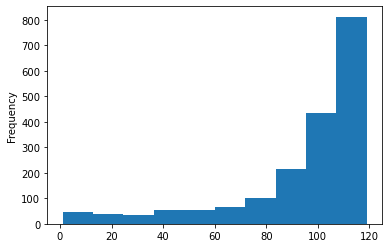

In [18]:
pos_particip = df_fup_a.participant_id.unique()
df_fup_b.loc[df_fup_b.participant_id.isin(pos_particip)].participant_id.value_counts().plot.hist()

<AxesSubplot:ylabel='Frequency'>

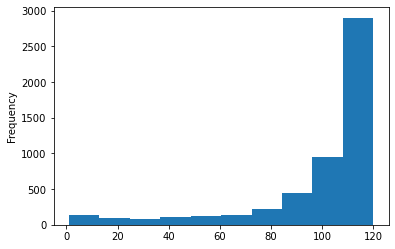

In [19]:
df_fup_b.participant_id.value_counts().plot.hist()

<AxesSubplot:>

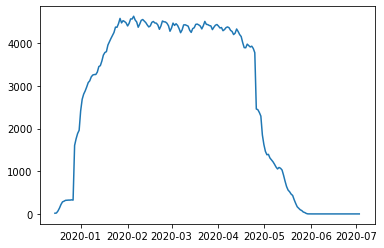

In [26]:
pd.concat([df_fup_a,df_fup_b]).timestamp.dt.date.value_counts().plot()

In [295]:
# Pick an time window for which all participants have survey data every day
df_daily_survey = pd.concat([df_fup_a,df_fup_b])
time_window = 59

df_survey_everyday = pd.DataFrame()

for participant in df_daily_survey.participant_id.unique():
    df = df_daily_survey.loc[df_daily_survey.participant_id == participant].sort_values('timestamp')
    df.reset_index(drop = True, inplace = True)
    
    start_index = df.index[(df.timestamp.dt.month == 2) & (df.timestamp.dt.day == 1)]
    if start_index.any():
        start_index = start_index[0]
        end_index = start_index + time_window
        if (len(df) - start_index) >= time_window+1:
            if (df.iloc[end_index].timestamp.date() - df.iloc[start_index].timestamp.date()).days == time_window:
                df_survey_everyday = pd.concat([df_survey_everyday, df.iloc[start_index:end_index+1]])


In [321]:
#Iterate over cols and one-hot encode. Drop the original
df_daily_survey = pd.concat([df_fup_a,df_fup_b])

no_one_hot = ['occurrence', 'timestamp', 'participant_id', 'have_flu', 'recovered_yn',
       'recovery_datetime','first_report_yn', 'first_sx_datetime', 'body_temp_f']
one_hot_encode = list(set(df_daily_survey.columns.values) - set(no_one_hot))
for col in one_hot_encode:
        df_daily_survey = pd.get_dummies(df_daily_survey ,prefix = col, columns = [col])

In [333]:
# Converting types from object to int
df_daily_survey['have_flu'] = df_daily_survey['have_flu'].astype('uint8')


In [335]:
df_daily_survey.to_csv('gates_data_csv/daily_surveys_onehot.csv')

In [336]:
pd.read_csv('gates_data_csv/daily_surveys_onehot.csv')

/homes/gws/melih/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (6,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,occurrence,timestamp,participant_id,have_flu,recovered_yn,recovery_datetime,first_report_yn,first_sx_datetime,body_temp_f,...,t_recov_severity__q_recov_sweats_0,t_recov_severity__q_recov_sweats_1,t_recov_severity__q_recov_sweats_2,t_recov_severity__q_recov_sweats_3,t_recov_severity__q_recov_sweats_skipped,symptom_severity__q_sneezing_0,symptom_severity__q_sneezing_1,symptom_severity__q_sneezing_2,symptom_severity__q_sneezing_3,symptom_severity__q_sneezing_skipped
0,0,13,2020-01-11 10:01:18.349,30ff405e67cdce3ae62b2c427c3c969f,1,0.0,skipped,0.0,skipped,97.5,...,0,0,0,0,1,0,0,1,0,0
1,1,86,2020-03-24 09:42:44.501,30ff405e67cdce3ae62b2c427c3c969f,1,0.0,skipped,1.0,2020-03-24T06:00:00-04:00,98.3,...,0,0,0,0,1,0,0,1,0,0
2,2,87,2020-03-25 08:04:16.985,30ff405e67cdce3ae62b2c427c3c969f,1,0.0,skipped,NaN,NaN,NaN,...,0,0,0,0,1,0,1,0,0,0
3,3,89,2020-03-27 08:41:45.246,30ff405e67cdce3ae62b2c427c3c969f,1,0.0,skipped,0.0,skipped,98.6,...,0,0,0,0,1,0,1,0,0,0
4,4,90,2020-03-28 07:39:59.078,30ff405e67cdce3ae62b2c427c3c969f,1,0.0,skipped,0.0,skipped,98.4,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527872,4894,12,2019-12-29 08:53:12.214,e2242ac209e62dd486cf76437dbc1d12,0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,0
527873,4895,120,2020-04-15 08:37:06.250,e2242ac209e62dd486cf76437dbc1d12,0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,0
527874,4896,13,2019-12-30 07:38:05.377,e2242ac209e62dd486cf76437dbc1d12,0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,0
527875,4897,14,2019-12-31 11:11:19.337,e2242ac209e62dd486cf76437dbc1d12,0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,0
